In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import country_converter as coco

In [129]:
df = pd.read_csv("gn_analysis_2023-05-12-0949.csv")
df = df.replace({"DigitalOcean, LLC": "DigitalOcean", "Amazon.com, Inc.": "Amazon", "CHINA UNICOM China169 Backbone": "CHINA UNICOM", "Aggros Operations Ltd.": "Aggros Operations", "Hong Kong Zhengxing Technology Co., Ltd.": "HK Zhengxing Technology"})
print (df["classification"].unique())
df

['unknown' 'malicious' 'benign']


,ip,classification,first_seen,last_seen,actor,spoofable,asn,category,country,country_code,...,city,organization,rdns,tor,os,tags,ja3,scans,paths,useragents
0,159.223.59.102,unknown,2023-04-13,2023-04-13,unknown,False,AS14061,hosting,Singapore,SG,...,Singapore,DigitalOcean,NaN,False,unknown,Python Requests Client|Web Crawler,NaN,80/TCP,/,python-requests/2.18.4
1,45.131.46.124,unknown,2021-09-15,2023-04-24,unknown,False,AS212913,hosting,Russia,RU,...,Moscow,FOP Hornostay Mykhaylo Ivanovych,host.sq,False,Windows 7/8,Web Crawler,NaN,80/TCP|81/TCP|82/TCP|83/TCP|84/TCP|85/TCP|86/T...,/,NaN
2,193.35.18.243,malicious,2023-04-07,2023-04-24,unknown,False,AS202685,business,Netherlands,NL,...,Hopel,Aggros Operations,243.18.35.193.pfcloud.io,False,Linux 3.11+,ADB Attempt|Carries HTTP Referer|Generic IoT B...,NaN,22/TCP|23/TCP|80/TCP|81/TCP|443/TCP|2222/TCP|5...,/HNAP1/|/,Mozila/5.0|
3,35.183.8.167,malicious,2023-04-22,2023-04-23,unknown,False,AS16509,hosting,Canada,CA,...,Montréal,Amazon,ec2-35-183-8-167.ca-central-1.compute.amazonaw...,False,Linux 2.2.x-3.x (Embedded),ENV Crawler|Web Crawler|ZMap Client,NaN,80/TCP,/.env,Mozilla/5.0 zgrab/0.x
4,54.226.215.6,malicious,2023-01-12,2023-04-23,unknown,False,AS14618,hosting,United States,US,...,Ashburn,Amazon,ec2-54-226-215-6.compute-1.amazonaws.com,False,Linux 2.2.x-3.x (Embedded),ENV Crawler|Web Crawler|ZMap Client,NaN,80/TCP,/.env,Mozilla/5.0 zgrab/0.x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,205.210.31.223,benign,2023-04-14,2023-05-12,Cortex Xpanse,False,AS396982,hosting,Brazil,BR,...,São Paulo,Google LLC,NaN,False,Linux 2.2.x-3.x (Embedded),Cortex Xpanse|Masscan Client|Ping Scanner|RDP ...,795bc7ce13f60d61e9ac03611dd36d90:80|18e9afaf91...,0/ICMP|20/TCP|21/TCP|22/TCP|23/TCP|53/UDP|67/T...,/,"Expanse, a Palo Alto Networks company, searche..."
494,205.210.31.92,benign,2023-04-14,2023-05-12,Cortex Xpanse,False,AS396982,hosting,United States,US,...,Des Moines,Google LLC,NaN,False,Linux 2.2.x-3.x (Embedded),Cortex Xpanse|Masscan Client|MongoDB Crawler|P...,795bc7ce13f60d61e9ac03611dd36d90:80|18e9afaf91...,0/ICMP|20/TCP|21/TCP|22/TCP|23/TCP|53/UDP|67/T...,/,"Expanse, a Palo Alto Networks company, searche..."
495,205.210.31.204,benign,2023-04-14,2023-05-12,Cortex Xpanse,False,AS396982,hosting,Brazil,BR,...,São Paulo,Google LLC,NaN,False,Linux 2.2.x-3.x (Embedded),Cortex Xpanse|Masscan Client|MongoDB Crawler|P...,795bc7ce13f60d61e9ac03611dd36d90:80|18e9afaf91...,0/ICMP|20/TCP|21/TCP|22/TCP|23/TCP|53/UDP|67/T...,/,"Expanse, a Palo Alto Networks company, searche..."
496,87.236.176.39,benign,2022-09-14,2023-05-12,Driftnet,False,AS211298,isp,United Kingdom,GB,...,Leeds,INTERNET MEASUREMENT,congratulated.monitoring.internet-measurement.com,False,Linux 2.2-3.x,Azure OMI RCE Check|Driftnet|RDP Alternative P...,7c16ad76eea772e6277cbb0a49d73a5f:443|798b5827f...,21/TCP|22/TCP|23/TCP|25/TCP|42/TCP|53/TCP|80/T...,/,Mozilla/5.0 (compatible; InternetMeasurement/1...


In [121]:
df_un = df.drop_duplicates(subset='ip', keep='first')
print ("Malicious IPs percentage: " +str(100*len(df_un[df_un["classification"] == "malicious"])/len(df_un)))
print ("Benign IPs percentage: " +str(100*len(df_un[df_un["classification"] == "benign"])/len(df_un)))


Malicious IPs percentage: 50.803212851405625
Benign IPs percentage: 23.49397590361446


In [131]:
df_un[df_un["classification"] == "malicious"]

,ip,classification,first_seen,last_seen,actor,spoofable,asn,category,country,country_code,...,city,organization,rdns,tor,os,tags,ja3,scans,paths,useragents
2,193.35.18.243,malicious,2023-04-07,2023-04-24,unknown,False,AS202685,business,Netherlands,NL,...,Hopel,Aggros Operations Ltd.,243.18.35.193.pfcloud.io,False,Linux 3.11+,ADB Attempt|Carries HTTP Referer|Generic IoT B...,NaN,22/TCP|23/TCP|80/TCP|81/TCP|443/TCP|2222/TCP|5...,/HNAP1/|/,Mozila/5.0|
3,35.183.8.167,malicious,2023-04-22,2023-04-23,unknown,False,AS16509,hosting,Canada,CA,...,Montréal,"Amazon.com, Inc.",ec2-35-183-8-167.ca-central-1.compute.amazonaw...,False,Linux 2.2.x-3.x (Embedded),ENV Crawler|Web Crawler|ZMap Client,NaN,80/TCP,/.env,Mozilla/5.0 zgrab/0.x
4,54.226.215.6,malicious,2023-01-12,2023-04-23,unknown,False,AS14618,hosting,United States,US,...,Ashburn,"Amazon.com, Inc.",ec2-54-226-215-6.compute-1.amazonaws.com,False,Linux 2.2.x-3.x (Embedded),ENV Crawler|Web Crawler|ZMap Client,NaN,80/TCP,/.env,Mozilla/5.0 zgrab/0.x
5,5.232.208.26,malicious,2020-12-17,2023-04-26,unknown,False,AS58224,isp,Iran,IR,...,Roshtkhvār,Iran Telecommunication Company PJS,NaN,False,Linux 2.2-3.x,Mirai,NaN,23/TCP|2323/TCP|37215/TCP|60023/TCP,NaN,NaN
6,178.186.201.219,malicious,2023-04-18,2023-04-27,unknown,False,AS12389,isp,Russia,RU,...,Barnaul,PJSC Rostelecom,178.186.201-219.xdsl.ab.ru,False,unknown,Generic IoT Brute Force Attempt|Mirai|Telnet B...,NaN,23/TCP|80/TCP|8080/TCP,/,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,220.171.34.195,malicious,2019-12-04,2023-05-12,unknown,False,AS4134,isp,China,CN,...,Beijing,CHINANET-BACKBONE,NaN,False,Linux 3.11+,DB2 Scanner|SSH Bruteforcer|TLS/SSL Crawler|We...,89be98bbd4f065fe510fca4893cf8d9b:1433,13/TCP|21/TCP|22/TCP|23/TCP|25/TCP|26/TCP|53/T...,/,NaN
488,35.216.237.60,malicious,2023-03-09,2023-05-12,XMCO.fr,False,AS15169,hosting,Switzerland,CH,...,Zürich,Google LLC,60.237.216.35.bc.googleusercontent.com,False,Linux 3.11+,ENV Crawler|Git Config Crawler|SMBv1 Crawler|S...,89be98bbd4f065fe510fca4893cf8d9b:21|1289771a3f...,21/TCP|80/TCP|111/TCP|445/TCP|8443/TCP|9092/TC...,/telescope/requests|/config.json|/info.php|/.g...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; ...
489,192.241.225.12,malicious,2022-12-21,2023-05-12,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",zg-1220a-116.stretchoid.com,False,Linux 3.11+,Apache Tomcat Crawler|Chromecast Scanner|Couch...,20c9baf81bfe96ff89722899e75d0190:53|caaddd3ed0...,20/TCP|21/TCP|22/TCP|23/TCP|25/TCP|26/TCP|53/T...,/DeviceDescription.xml|/rootDesc.xml|/owa/auth...,Mozilla/5.0 zgrab/0.x
490,198.199.116.56,malicious,2021-01-02,2023-05-12,Stretchoid,False,AS14061,hosting,United States,US,...,San Francisco,"DigitalOcean, LLC",zg-1220b-67.stretchoid.com,False,Linux 3.11+,Apache Tomcat Crawler|Chromecast Scanner|Couch...,1289771a3fce256d5fb4cb5c95b43ee6:443|f6692d090...,20/TCP|21/TCP|22/TCP|23/TCP|25/TCP|26/TCP|53/T...,/portal/redlion|/_stats/indices|/v2/|/|/manage...,Mozilla/5.0 zgrab/0.x


In [69]:
# Setting the path to the shapefile
SHAPEFILE = 'worldmap/ne_10m_admin_0_countries.shp'
# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['ADMIN', 'ADM0_A3', 'geometry']]
# Rename columns.
geo_df.columns = ['country', 'country_code', 'geometry']
geo_df.head(3)

,country,country_code,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [70]:
# Next, we need to ensure that our data matches with the country codes.
iso3_codes = geo_df['country'].to_list()
# Convert to iso3_codes
iso2_codes_list = coco.convert(names=iso3_codes, to='ISO2', not_found='NULL')
# Add the list with iso2 codes to the dataframe
geo_df['iso2_code'] = iso2_codes_list
# There are some countries for which the converter could not find a country code.
# We will drop these countries.
geo_df = geo_df.drop(geo_df.loc[geo_df['iso2_code'] == 'NULL'].index)
geo_df.head(3)

Dhekelia Sovereign Base Area not found in regex
US Naval Base Guantanamo Bay not found in regex
Siachen Glacier not found in regex
Baykonur Cosmodrome not found in regex
Akrotiri Sovereign Base Area not found in regex
Southern Patagonian Ice Field not found in regex
Bir Tawil not found in regex
Indian Ocean Territories not found in regex
Coral Sea Islands not found in regex
Spratly Islands not found in regex
Clipperton Island not found in regex
Ashmore and Cartier Islands not found in regex
Bajo Nuevo Bank (Petrel Is.) not found in regex
Serranilla Bank not found in regex
Scarborough Reef not found in regex


,country,country_code,geometry,iso2_code
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",MY
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",CL


In [71]:
df1 = df.groupby(["country"]).size().reset_index(name='frequency')
# Merge the two dataframes
merged_df = pd.merge(left=geo_df, right=df1, how='left', left_on='country', right_on='country')
#Create the indicator values
merged_df['frequency'].fillna(0, inplace=True)
merged_df.head(3)


,country,country_code,geometry,iso2_code,frequency
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",ID,1.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",MY,0.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",CL,0.0


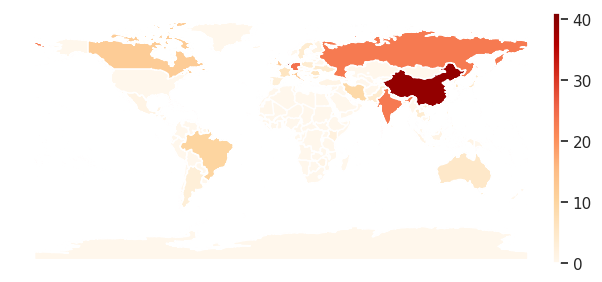

In [116]:
# Show the data
# Plot the map
title = 'IPS origin'
col = 'frequency'
vmin = merged_df[col].min()
vmax = merged_df[col].max()
cmap = 'OrRd'

fig, ax = plt.subplots(1, figsize=(7, 5))
ax.axis('off')
merged_df.plot(column=col, ax=ax, linewidth=1, cmap=cmap, edgecolor='white')
#ax.set_title(title, fontdict={'fontsize': '15', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.9, 0.25, 0.01, 0.5])
cbar = fig.colorbar(sm, cax=cbaxes)
fig.savefig('imgs/world.pdf', bbox_inches = 'tight', pad_inches = 0)

                  country  frequency
43          United States        163
26            Netherlands         41
9                   China         39
14                Germany         24
33                 Russia         23
16                  India         23
4                 Belgium         22
42         United Kingdom         13
19                  Italy         13
15              Hong Kong         12
8                  Canada         12
5                  Brazil         10
34              Singapore         10
18                   Iran          9
35            South Korea          6
32                Romania          6
13                 France          6
20                  Japan          5
2               Australia          5
31                 Poland          4
39               Thailand          4
37                 Sweden          4
41                Ukraine          4
27               Pakistan          4
38            Switzerland          3
36                  Spain          3
6

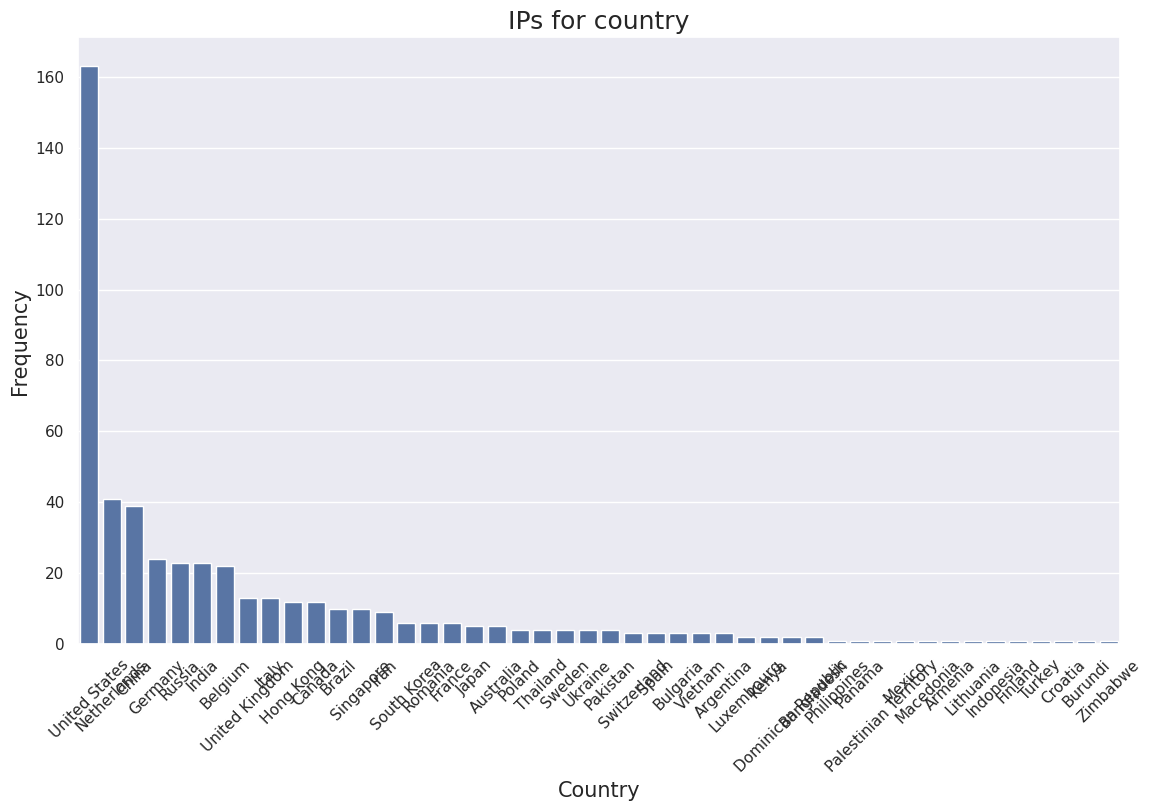

In [73]:
# country counter
sns.set(rc={'figure.figsize':(11.7,8.27)})
df1 = df.groupby(["country"]).size().reset_index(name='frequency')
print (df1.sort_values('frequency',ascending = False))
g = sns.barplot(x='country',  y="frequency", data=df1, order=df1.sort_values('frequency',ascending = False).country, color='b')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
# set labels
plt.xlabel("Country", size=15)
plt.ylabel("Frequency", size=15)
plt.title("IPs for country", size=18)
plt.tight_layout()
plt.savefig('imgs/countries.pdf')

                                      organization  frequency
28                               DigitalOcean, LLC         47
6                                 Amazon.com, Inc.         20
11                  CHINA UNICOM China169 Backbone         14
37                                      Google LLC         14
39        Hong Kong Zhengxing Technology Co., Ltd.          7
..                                             ...        ...
46                         J.R da Silva Almeida-ME          1
45   Irádio Comercio e Manutenção de Maquinas LTDA          1
43                                Intersvyaz-2 JSC          1
41                           IT4 Polska Sp. z o.o.          1
104                        aamra networks limited,          1

[105 rows x 2 columns]


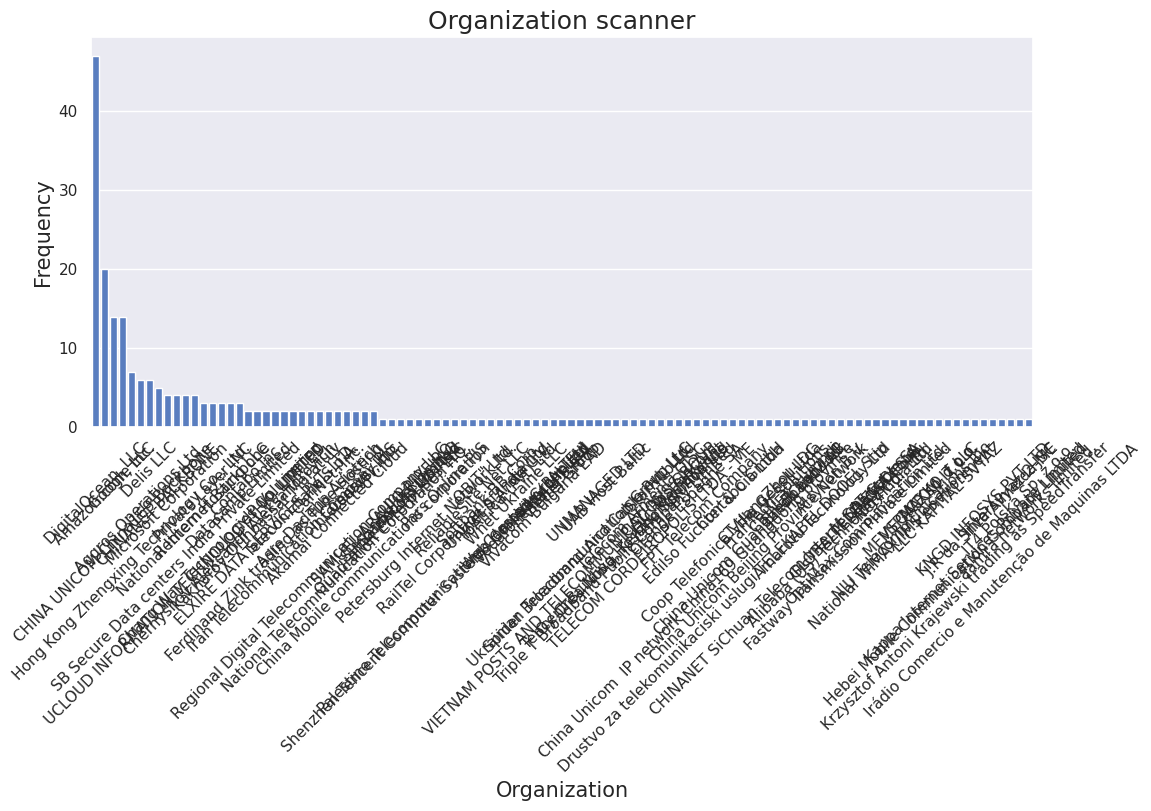

In [74]:
# country counter
sns.set(rc={'figure.figsize':(11.7,8.27)})
df2 = df[df["classification"] == 'malicious']
df2 = df2.groupby(["organization"]).size().reset_index(name='frequency')
sns.set_color_codes("muted")
g = sns.barplot(x='organization',  y="frequency", data=df2, order=df2.sort_values('frequency',ascending = False).organization, color='b')
print (df2.sort_values('frequency',ascending = False))
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

# set labels
plt.xlabel("Organization", size=15)
plt.ylabel("Frequency", size=15)
plt.title("Organization scanner", size=18)
plt.tight_layout()
plt.savefig('imgs/organizations.pdf')

In [106]:
df2

,organization,frequency
0,"""OBIT"" Ltd.",1
1,Aggros Operations Ltd.,6
2,Akamai Connected Cloud,2
3,"Alibaba (US) Technology Co., Ltd.",1
4,Alsycon B.V.,1
...,...,...
100,Vodafone Italia S.p.A.,1
101,Web Hosted Group Ltd,1
102,Wnet Ukraine LLC,1
103,YoAfrica (Pvt) Ltd,1


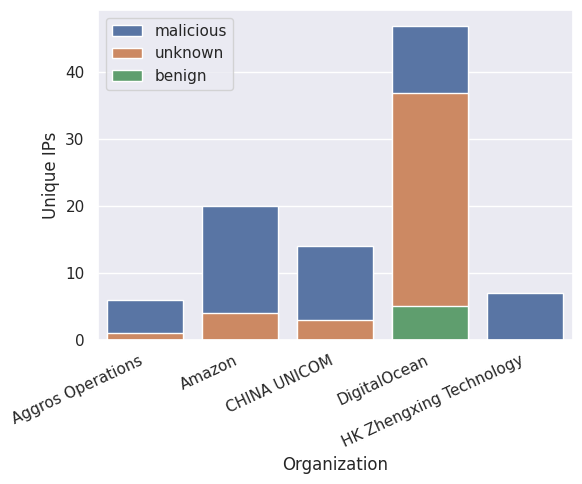

In [128]:
sns.set(rc={'figure.figsize':(6,5)})

df3 = df.groupby(["organization"])["classification"].value_counts().reset_index()
selected_orga = ["DigitalOcean", "Amazon", "CHINA UNICOM", "Aggros Operations", "HK Zhengxing Technology" ]
g = sns.barplot(
    data=df3[df3["organization"].isin(selected_orga)],
    x="organization", y="count", hue="classification", dodge=False
)

g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')

# set labels
plt.xlabel("Organization")
plt.ylabel("Unique IPs")
plt.legend(loc='upper left')
#plt.title("", size=18)
plt.tight_layout()
plt.savefig('imgs/organization_stacked.pdf')